In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download uciml/sms-spam-collection-dataset
! unzip sms-spam-collection-dataset.zip

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 31.4MB/s]
Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [3]:
import pandas as pd
df = pd.read_csv('/content/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.rename(columns=
{
"v1": "Label",
"v2": "Message"
}, inplace=True)
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re


In [14]:
lem = WordNetLemmatizer()

In [15]:
def convert(message):
  message = re.sub('[^a-zA-Z]',' ',message)
  words = nltk.word_tokenize(message)
  words = [lem.lemmatize(word) for word in words if not word in set(stopwords.words('english'))]
  return ' '.join(words)

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [19]:
Messages = df.Message.apply(lambda x:convert(x))

In [20]:
Messages[0]

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=4000)
X = vectorizer.fit_transform(Messages)
vectorizer.get_feature_names()[:5]

['aah', 'aathi', 'abi', 'ability', 'abiola']

In [26]:
X.shape

(5572, 4000)

In [27]:
y = pd.get_dummies(df.Label,drop_first=True)
y

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [31]:
clf.score(X_test,y_test)

0.9730941704035875

In [33]:
y_pred = clf.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred)

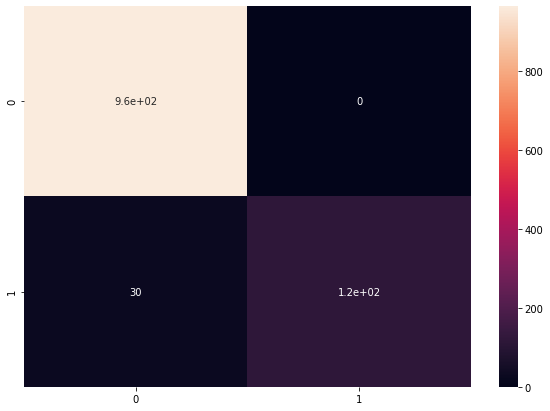

In [35]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(conf, annot=True)